## Linerar regression to predict weather

First, we are going to import our libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

the, lets read our csv dataset and expore it a little bit

In [2]:
df= pd.read_csv('weatherHistory.csv',low_memory=False)

In [3]:
df.head()
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

We are not going to use all these columns, this is why we should remove them

In [4]:
df = df.drop(df.columns[[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis=1)


Then, we found that the pandas profiling library has a lot of useful tools for data exploring

In [5]:

import pandas_profiling
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

We noticed that our dataset has duplicated and nan rows, so we dhouls remove them to have a cliner dataset

In [7]:
df.drop_duplicates
df.dropna

<bound method DataFrame.dropna of           STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  
0       23.888889        0         NaN  42  
1       25.555556      

In [8]:
df.head()

STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  
0        0         NaN  42  
1        0         NaN  42  
2        0         NaN  42  
3        0         NaN  42  
4        0         NaN  42

Then, we should to remore the outliers with the library scipy, remeber that an outlier is a value that it's outside the std of the data set

In [9]:
from scipy import stats
df=df[(np.abs(stats.zscore(df[['MaxTemp','MinTemp','MeanTemp']])) < 3)]
df.describe()

STA  WindGustSpd        MaxTemp        MinTemp  \
count  349980.000000  1596.000000  349980.000000  349980.000000   
mean    29907.399229    37.774534      27.764510      18.443484   
std     21061.022631    10.291349       7.089999       6.958957   
min     10001.000000    18.520000     -17.777778     -26.111111   
25%     11801.000000    29.632000      25.555556      15.555556   
50%     22509.000000    37.040000      29.444444      21.111111   
75%     34002.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR  
count  349980.000000  349980.000000  
mean       23.103947      43.815229  
std         6.732474       1.132512  
min       -17.777778      40.000000  
25%        21.111111      43.000000  
50%        25.555556      44.000000  
75%        27.222222      45.000000  
max        40.000000      45.000000

lest check again our dataset features with pandas profiling to analice if we did the cleaning proces good

In [10]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

know, lets see the correlation between variables

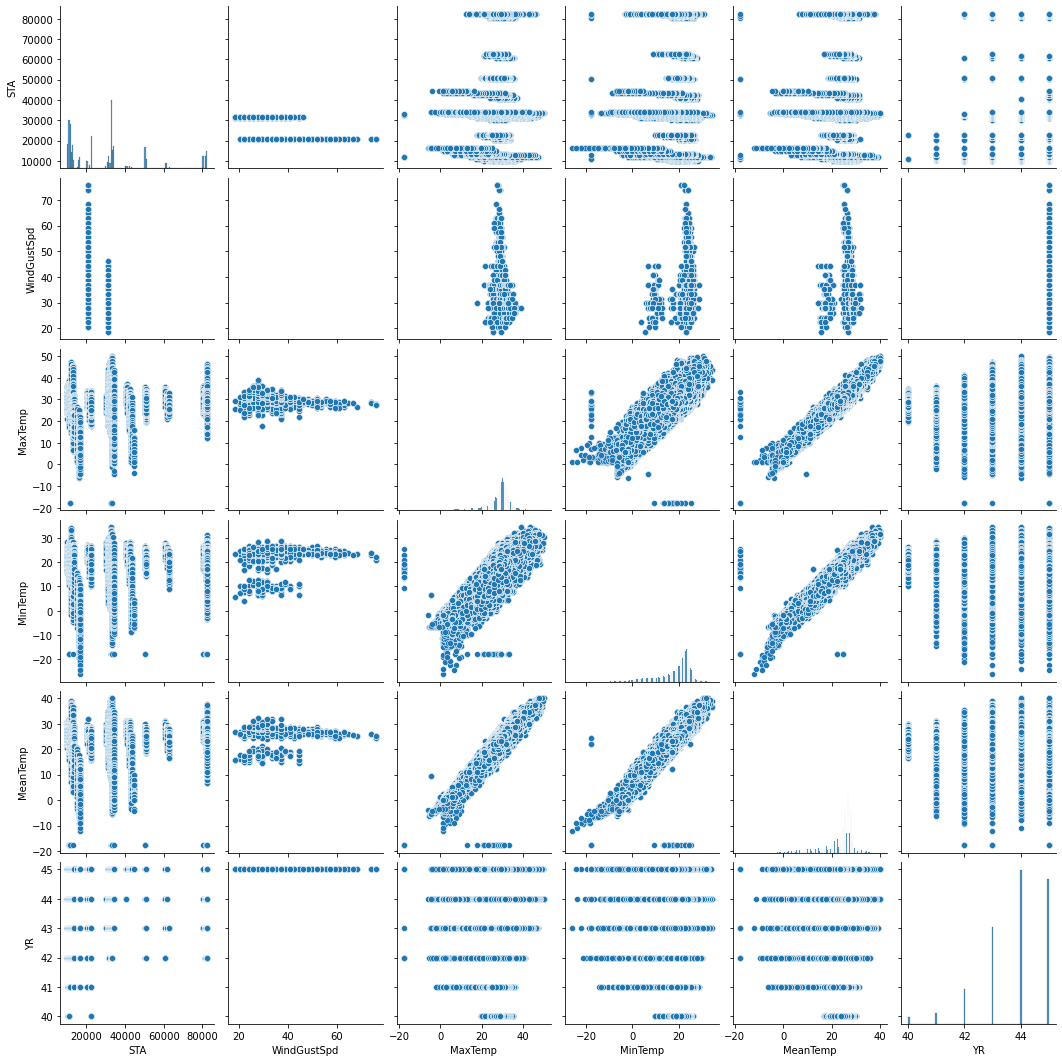

In [12]:
sns.pairplot(df,palette='bwr')

We saw that the best correlation is between MaxTem and MinTem, so, lets try tu predict the MaxTemp giving the MinTemp

In [14]:
y = df['MaxTemp'].to_numpy()
x = df['MinTemp'].to_numpy()
#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1001)

#Change Data to 2D array 
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)
y_train2 = y_train.reshape(-1,1)
y_test2 = y_test.reshape(-1,1)

Lest plot our regression line

Text(0, 0.5, 'MaxTemp')

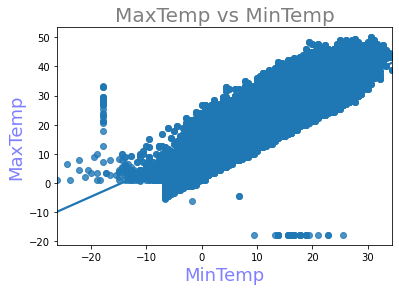

In [16]:
#Regression Line Visualization
lmgraph=sns.regplot(x=x,y=y)
lmgraph.axes.set_title("MaxTemp vs MinTemp",size=20,color='black',alpha=0.5)
lmgraph.set_xlabel("MinTemp",size=18,color='blue',alpha=0.5)
lmgraph.set_ylabel("MaxTemp",size=18,color='blue',alpha=0.5)

know, lest create and set our linear regression model and see the results

In [17]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train2)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
print('Coefficient: {:0.2f}'.format((float(method.coef_))))
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 

Method: Linear Regression

Intercept: 12.19
Coefficient: 0.84

R2: 0.68
Mean Absolute Error: 3.05
Mean Squared Error: 15.76
Root Mean Squared Error: 3.97


In [18]:
#Forecast Table
predict2 = predict.reshape(-1)
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble


Forecast Table


Actual  Predicted  Difference
0       30.000000      31.42        1.42
1       32.222222      27.20       -5.02
2        3.333333      12.19        8.85
3       23.888889      20.63       -3.26
4       31.666667      30.48       -1.18
...           ...        ...         ...
104989  22.777778      27.67        4.89
104990  29.444444      30.95        1.51
104991  30.555556      30.01       -0.54
104992  29.444444      30.95        1.51
104993  32.777778      27.67       -5.11

[104994 rows x 3 columns]